# Workshop - 1: K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\karth\Desktop\Intenship\Task 2\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To find optimum number of clusters for K Means

In [5]:
X=data.drop("Species",axis=1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [6]:
from sklearn.cluster import KMeans

#### To find the right cluster we plot elbow plot 

In [8]:
elbow=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10,init='k-means++')
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

In [10]:
elbow

[281918.32439999987,
 70616.29893333331,
 31326.886800000007,
 17819.682399028585,
 11441.17861957731,
 7904.921685897434,
 5923.945246470921,
 4575.739393336284,
 3582.216930555555,
 2969.0922738095246]

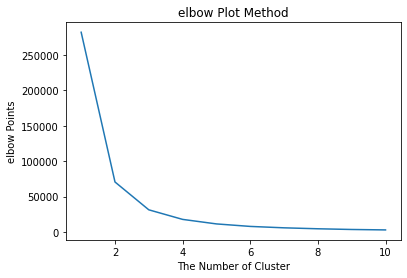

In [15]:
plt.plot(range(1,11),elbow)
plt.title("elbow Plot Method")
plt.xlabel("The Number of Cluster")
plt.ylabel("elbow Points")
plt.show()

### From the above grap we can clear see that **3** is right cluster 

In [45]:
kmeans=KMeans(n_clusters=3,max_iter=300,n_init=10,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

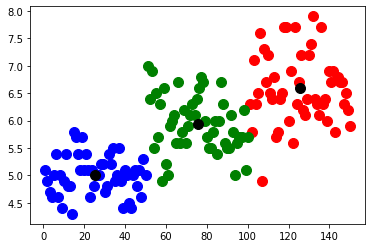

In [43]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans ==1,0], X.iloc[y_kmeans == 1,1], 
            s = 100, c ="blue", label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans ==2,0], X.iloc[y_kmeans ==2,1], 
            s = 100, c ="green", label = 'Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.show()

### Ploting the centroids on above Grap

In [39]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])